## Regressão

- Mínimos quadrados
- Técnica do gradiente (back propagation)

In [1]:
!pip install scikit-learn==0.24.2

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

     |████████████████████████████████| 22.3 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [3]:
len(y.unique())

214

In [4]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [5]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [8]:
y_pred

array([139.08818953, 184.74125514, 131.61177039, 284.9035854 ,
       122.6468847 ,  90.1167907 , 257.30932933, 179.16336807,
        81.60035676, 109.90580886,  95.93715158, 168.86595235,
        61.06732465, 202.54435299,  95.67011301, 129.52276107,
       211.39909669, 247.04756341, 201.84421216, 218.29495495,
       204.74413679,  89.2468371 ,  65.74093422, 189.76373142,
       157.0112179 , 164.0880846 , 195.89679792, 184.44450671,
        47.17750387, 108.36069904, 175.22521052,  89.70928569,
       127.68174172, 181.57812219, 168.40508793, 195.63744403,
       120.01938265, 115.51658031, 139.78673887,  59.50285127,
        67.15020924, 108.67013465, 170.25173735, 145.33824215,
       167.86903176,  65.41240534,  71.23481769, 105.92988024,
        55.55064416, 165.26415169, 155.67283036,  66.95832863,
       110.93991565, 106.10552633, 179.34575719, 163.38807511,
        90.807142  , 212.75658307, 120.74198655,  63.60904313,
       185.25273214, 204.70618561, 140.91914669, 105.09

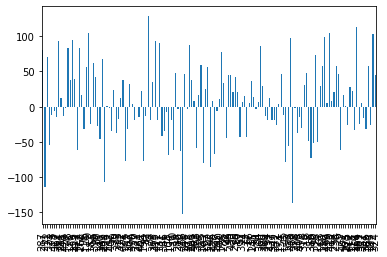

In [9]:
(y_test - y_pred).plot.bar()

In [10]:
y_test.min(), y_test.max()

(37.0, 317.0)

In [11]:
mean_squared_error(y_test, y_pred)  # MSE

2817.8015701686772

In [12]:
mean_squared_error(y_test, y_pred) ** 0.5  #RMSE

53.08296873921689

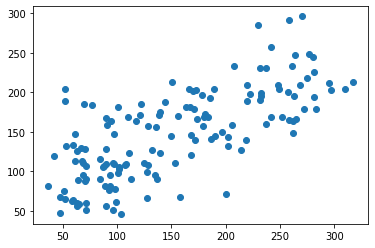

In [13]:
plt.scatter(y_test, y_pred)

In [14]:
r2_score(y_test, y_pred)

0.510395426135144

In [15]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(rmse)

54.199250568076025


In [16]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
print('Melhor apha:', reg.alpha_)

y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print('Melhor RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('Melhor R2:', r2)

Melhor apha: 0.1
Melhor RMSE: 52.98480016536978
Melhor R2: 0.512204644448103


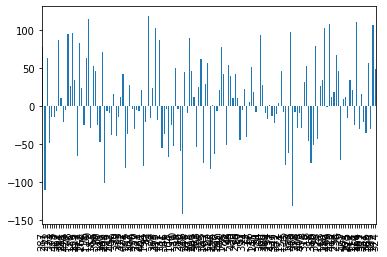

In [17]:
(y_test - y_pred).plot.bar()

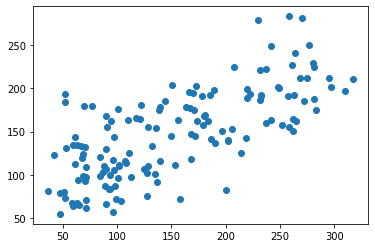

In [18]:
plt.scatter(y_test, y_pred)

In [19]:
reg = linear_model.Lasso(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(rmse)

55.36664054265001


In [20]:
reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
print('Melhor alpha:', reg.alpha_)

y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print('Melhor RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('Melhor R2:', r2)

Melhor apha: 0.001
Melhor RMSE: 53.082289754390736
Melhor R2: 0.5104079511298186


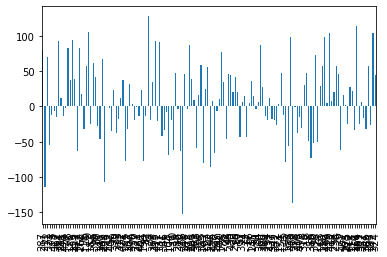

In [21]:
(y_test - y_pred).plot.bar()

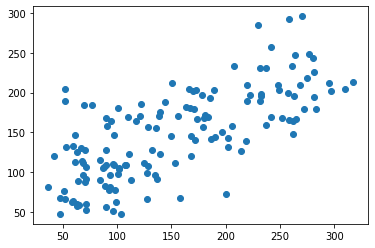

In [22]:
plt.scatter(y_test, y_pred)

In [25]:
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(rmse)

75.01607554873111


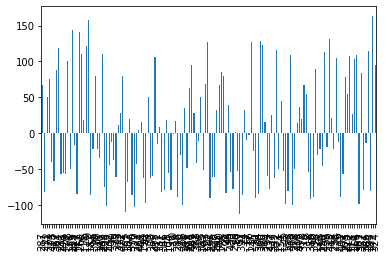

In [26]:
(y_test - y_pred).plot.bar()

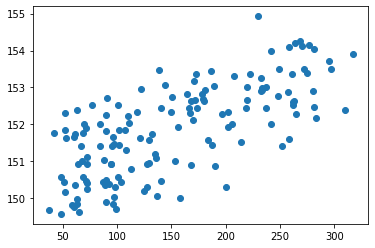

In [27]:
plt.scatter(y_test, y_pred)

In [24]:
reg = linear_model.ElasticNetCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
print('Melhor alpha:', reg.alpha_)

y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print('Melhor RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('Melhor R2:', r2)

Melhor apha: 1e-05
Melhor RMSE: 53.117935440726086
Melhor R2: 0.5097501911011315


In [28]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(rmse)

53.13869247743689


In [31]:
from sklearn import svm

reg = svm.SVR(C=20)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(rmse)

51.55269520620241


In [30]:
for C in [10,15,20,25,30,35,40,45,50]:
  reg = svm.SVR(C=C)
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred) ** 0.5
  print(rmse)

53.13296893670793
51.76204453666797
51.55269520620241
51.69770000030005
51.95351322247077
52.135706612126754
52.316207228302446
52.511824120000426
52.70249192315913


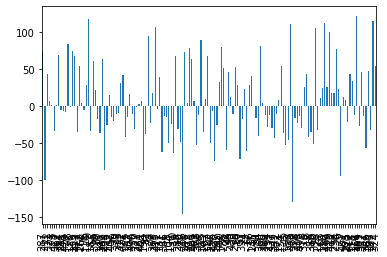

In [32]:
(y_test - y_pred).plot.bar()

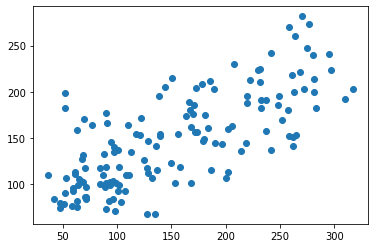

In [33]:
plt.scatter(y_test, y_pred)

In [34]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes = (40,30,20,20,20))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(rmse)

53.582167508976255


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


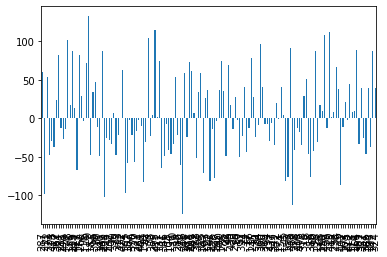

In [35]:
(y_test - y_pred).plot.bar()

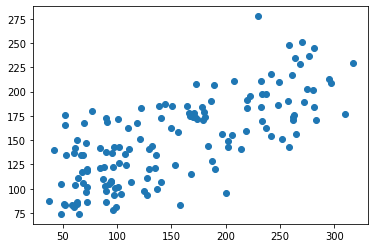

In [36]:
plt.scatter(y_test, y_pred)

In [ ]:
X, y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)